In [5]:
import pandas as pd

# Load the Excel file
file_path = '/Users/anika/Downloads/CA259 Students.xlsx'
xl = pd.ExcelFile(file_path)

# Load the two sheets into two DataFrames
df1 = xl.parse(0)  # The first sheet is the one to merge into
df2 = xl.parse(1)  # The second sheet contains the data to merge

# Identify the 4-digit number columns in both DataFrames
column_4_digit_1 = df1.columns[13]
column_4_digit_2 = df2.columns[0]

# Merge the DataFrames on the 4-digit number column
merged_df = pd.merge(df1, df2, left_on=column_4_digit_1, right_on=column_4_digit_2, how='left')

merged_df # Display the first few rows of the merged DataFrame

output_file_path = '/Users/anika/Downloads/merged_CA259 Students.xlsx'  
merged_df.to_excel(output_file_path, index=False)



,Age (in years),CAO Points (100 to 600),"Daily travel to DCU (in km, 0 if on-campus)",Average year 1 exam result (as %),Seat row in class,Gender,Number of older siblings,Number of younger siblings,Old Dublin postcode (0 if outside Dublin),Height (in cm),...,Hair colour,Last 4 digits of your mobile (0000 to 9999),Star sign,Shoe size,Last 4 digits of your mobile (same as on previous form),Your rating for EXTRAVERSION (vs. introversion),Your rating for INTUITION (vs. observation),Your rating for THINKING (vs. feeling),Your rating for JUDGING (vs. prospecting),Your rating for ASSERTIVE (vs. turbulent)
0,21,xxxxx,10,66,4,Male,0,2,0,178.0,...,Brown,5262,Capricorn,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,22,505,xxxxx,68,7,Female,0,1,0,155.0,...,Brown,7181,Leo,4.0,7181.0,32.0,62.0,23.0,35.0,31.0
2,20,600,30,xxxxx,6,Female,1,2,0,180.0,...,Brown,7677,Leo,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,19,543,10,71,xxxxx,Male,0,1,13,187.0,...,Red,838,Taurus,9.0,838.0,48.0,41.0,57.0,49.0,36.0
4,xxxxx,407,8,73,1,Male,2,0,15,181.0,...,Brown,6290,Cancer,9.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,21,565,7,71,3,Female,2,1,14,170.0,...,Black,1699,Libra,6.0,1699.0,64.0,69.0,63.0,58.0,60.0
121,20,520,7,62,8,Female,0,2,7,165.0,...,Black,5289,Taurus,5.0,5289.0,61.0,55.0,66.0,49.0,67.0
122,20,510,60,65,5,Male,1,1,0,184.0,...,Brown,5317,Libra,10.0,5317.0,25.0,24.0,49.0,44.0,10.0
123,23,490,7,70,4,Female,0,3,7,173.0,...,Blonde,4602,Aquarius,7.0,4602.0,29.0,23.0,32.0,60.0,32.0


In [6]:
import pandas as pd

# Angenommen, 'merged_df' ist Ihr zusammengeführter DataFrame
personality_columns = [
    'Star sign',
    'Your rating for EXTRAVERSION (vs. introversion)', 
    'Your rating for INTUITION (vs. observation)',
    'Your rating for THINKING (vs. feeling)', 
    'Your rating for JUDGING (vs. prospecting)',
    'Your rating for ASSERTIVE (vs. turbulent)'
]

# Filter out rows with missing Star sign or personality ratings
personality_df = merged_df.dropna(subset=personality_columns)

# Convert personality rating columns to numeric, errors='coerce' will convert non-numeric values to NaN
for col in personality_columns[1:]:
    personality_df[col] = pd.to_numeric(personality_df[col], errors='coerce')

# Group by Star sign and calculate mean personality ratings
personality_analysis = personality_df.groupby('Star sign')[personality_columns[1:]].mean()

print(personality_analysis)


             Your rating for EXTRAVERSION (vs. introversion)  \
Star sign                                                      
Aquarius                                           53.285714   
Aries                                              58.750000   
Cancer                                             64.000000   
Capricorn                                          54.750000   
Gemini                                             58.428571   
Leo                                                55.400000   
Libra                                              42.500000   
Pices                                              56.000000   
Sagittarius                                        50.666667   
Scorpio                                            48.400000   
Taurus                                             62.800000   
Virgo                                              55.750000   

             Your rating for INTUITION (vs. observation)  \
Star sign                                  

/var/folders/my/x81jbrpd4qv2yckc9_qwp4d40000gn/T/ipykernel_47749/1574459106.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personality_df[col] = pd.to_numeric(personality_df[col], errors='coerce')


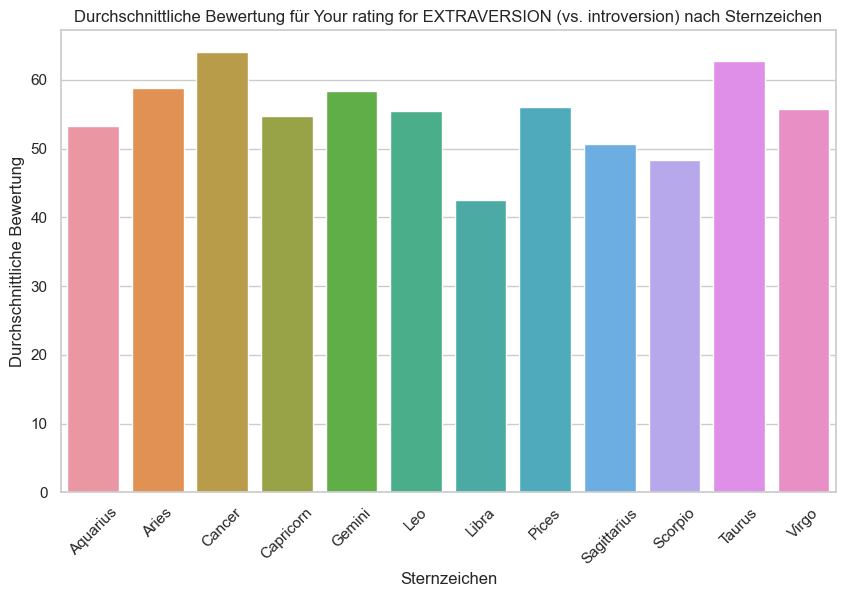

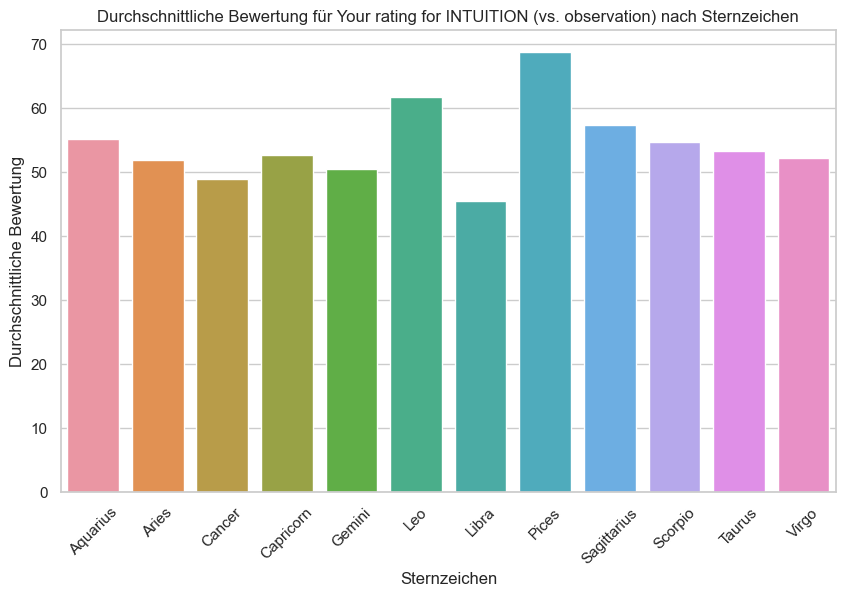

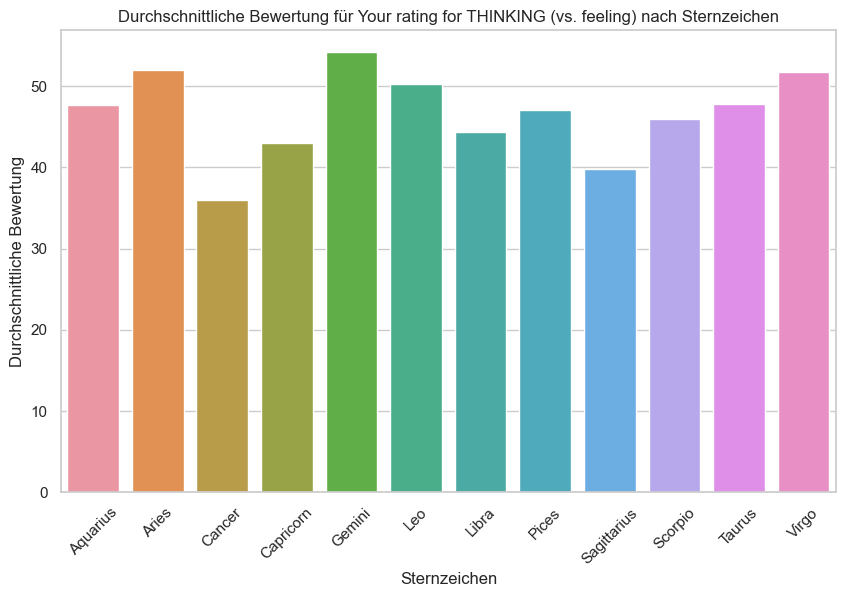

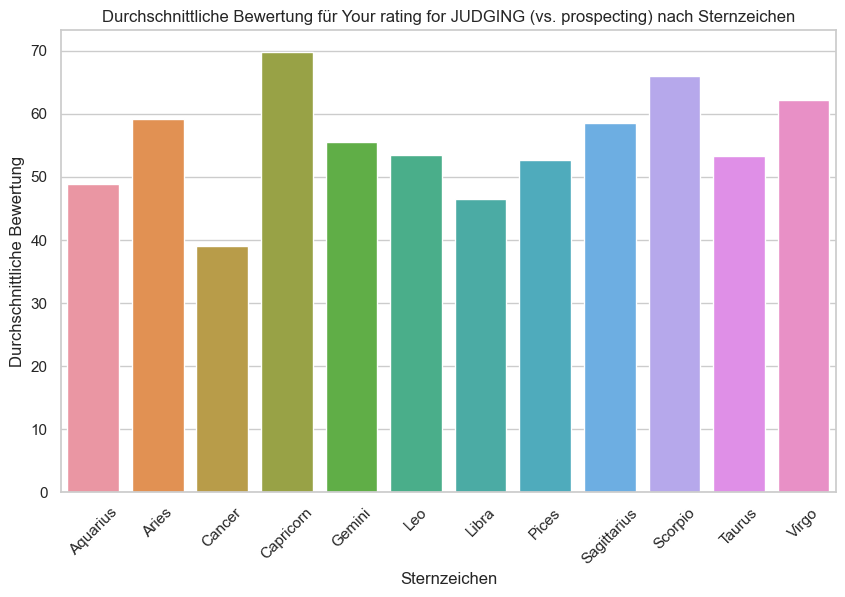

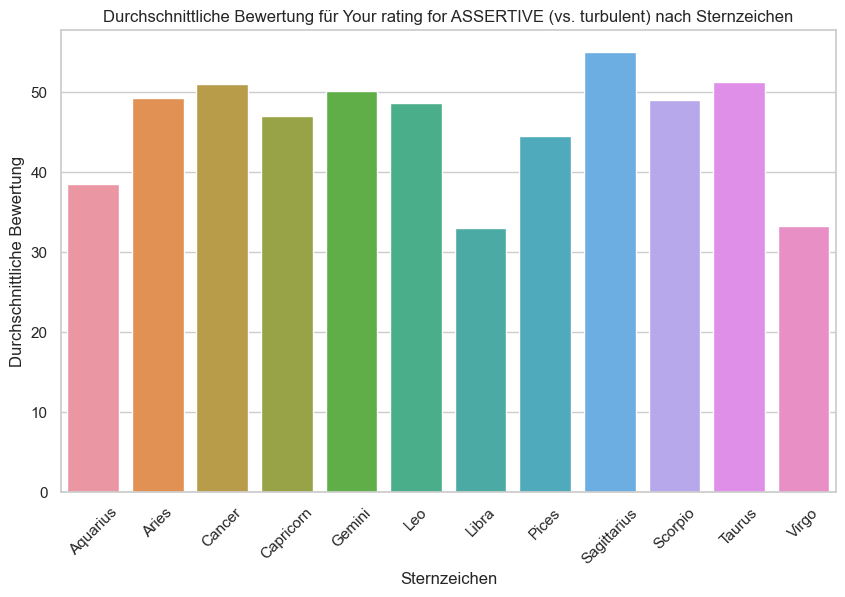

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stellen Sie sicher, dass 'personality_analysis' Ihr DataFrame ist, der die durchschnittlichen Bewertungen enthält
# Beispiel:
# personality_analysis = pd.DataFrame({
#     'Extraversion': [4.5, 3.8, 4.2, ...],
#     'Intuition': [3.7, 4.1, 3.9, ...],
#     ...
# }, index=['Widder', 'Stier', 'Zwillinge', ...])

# Setzen Sie den Stil
sns.set(style="whitegrid")

# Erstellen Sie einen Plot für jede Persönlichkeitsdimension
for column in personality_analysis.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=personality_analysis.index, y=personality_analysis[column])
    plt.title(f'Durchschnittliche Bewertung für {column} nach Sternzeichen')
    plt.xticks(rotation=45)  # Drehen Sie die x-Achsen-Beschriftungen für bessere Lesbarkeit
    plt.ylabel('Durchschnittliche Bewertung')
    plt.xlabel('Sternzeichen')
    plt.show()


In [8]:
import pandas as pd

# Angenommen, 'merged_df' ist Ihr zusammengeführter DataFrame und 'Star sign' ist die Spalte mit den Sternzeichen
star_sign_counts = merged_df['Star sign'].value_counts()

# Das am häufigsten vorkommende Sternzeichen finden
most_common_star_sign = star_sign_counts.idxmax()
most_common_count = star_sign_counts.max()

print(f'Das am häufigsten vorkommende Sternzeichen ist {most_common_star_sign} mit {most_common_count} Vorkommen.')


Das am häufigsten vorkommende Sternzeichen ist Leo mit 18 Vorkommen.


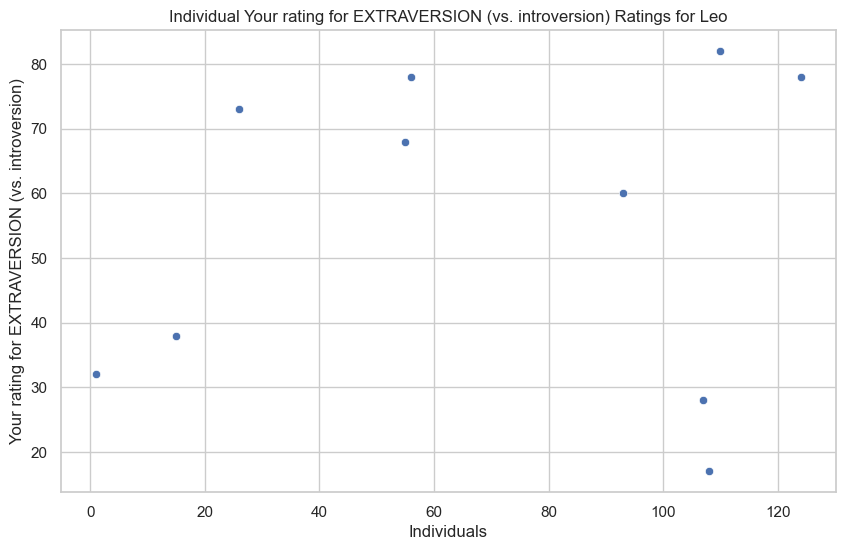

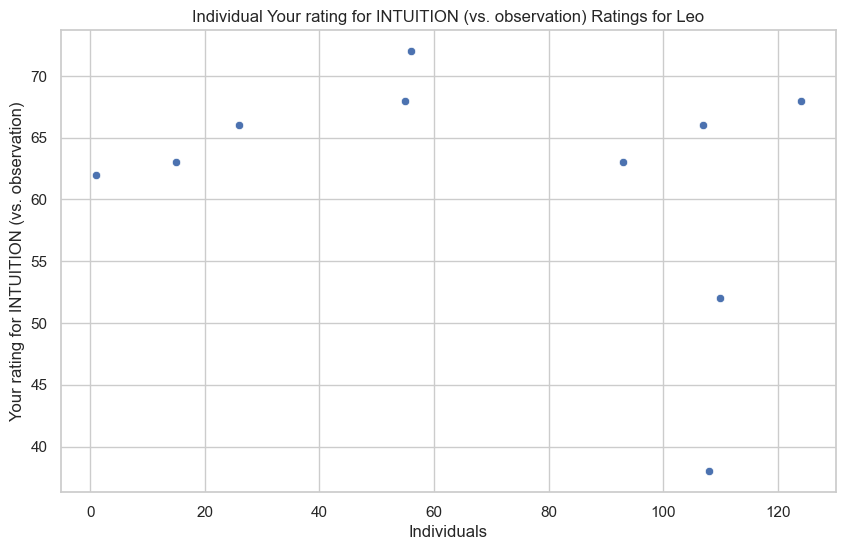

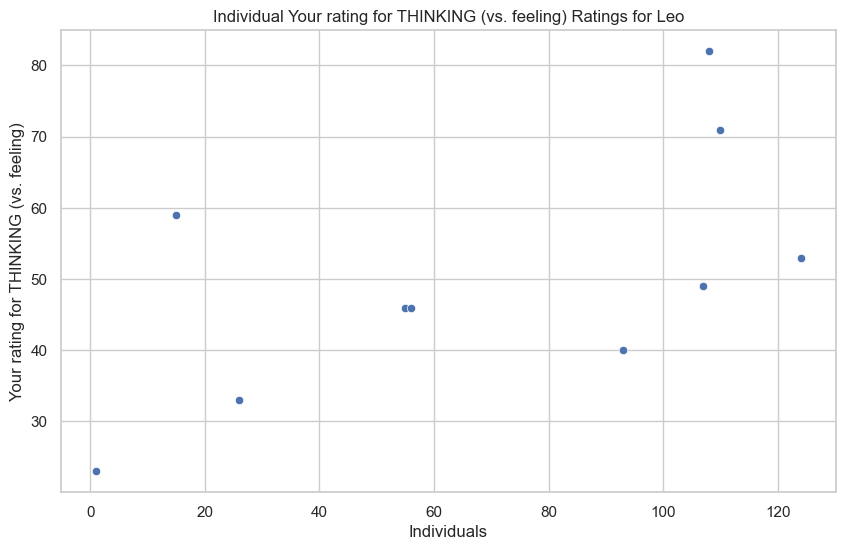

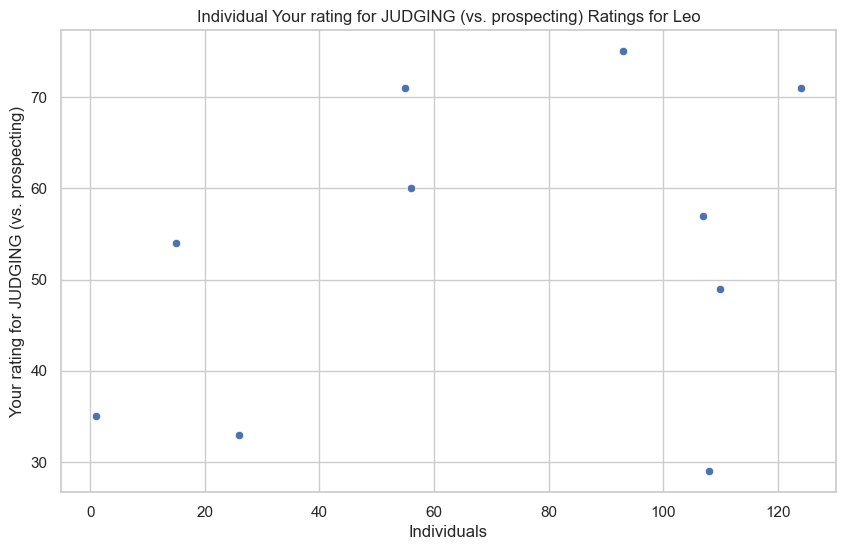

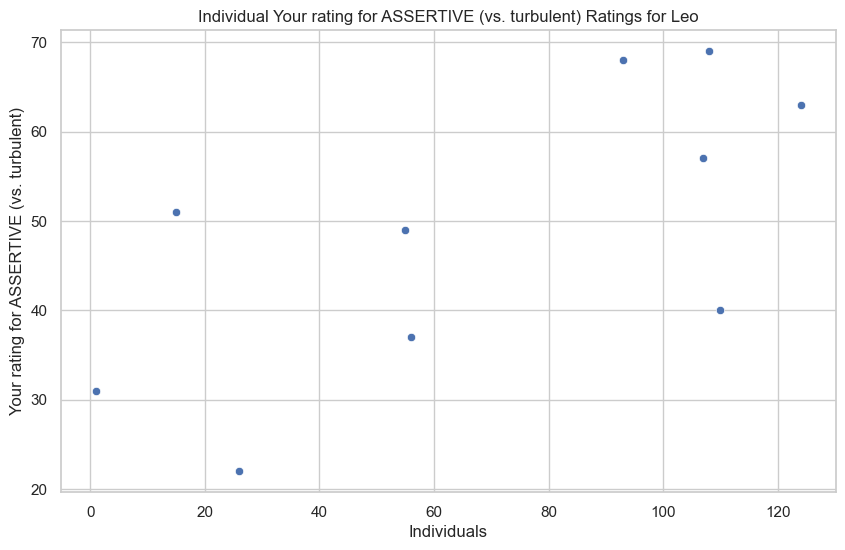

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your merged DataFrame and 'Star sign' is the column with the star signs
# Step 1: Identify the most common star sign
most_common_star_sign = merged_df['Star sign'].value_counts().idxmax()

# Step 2: Filter the dataset for the most common star sign
common_sign_df = merged_df[merged_df['Star sign'] == most_common_star_sign]

# Personality rating columns - replace these with the actual column names from your dataset
personality_ratings = [
    'Your rating for EXTRAVERSION (vs. introversion)',
    'Your rating for INTUITION (vs. observation)',
    'Your rating for THINKING (vs. feeling)',
    'Your rating for JUDGING (vs. prospecting)',
    'Your rating for ASSERTIVE (vs. turbulent)'
]

# Step 3: Plot scatterplots for each personality rating
for rating in personality_ratings:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=common_sign_df, x=common_sign_df.index, y=rating)
    plt.title(f'Individual {rating} Ratings for {most_common_star_sign}')
    plt.xlabel('Individuals')
    plt.ylabel(rating)
    plt.show()


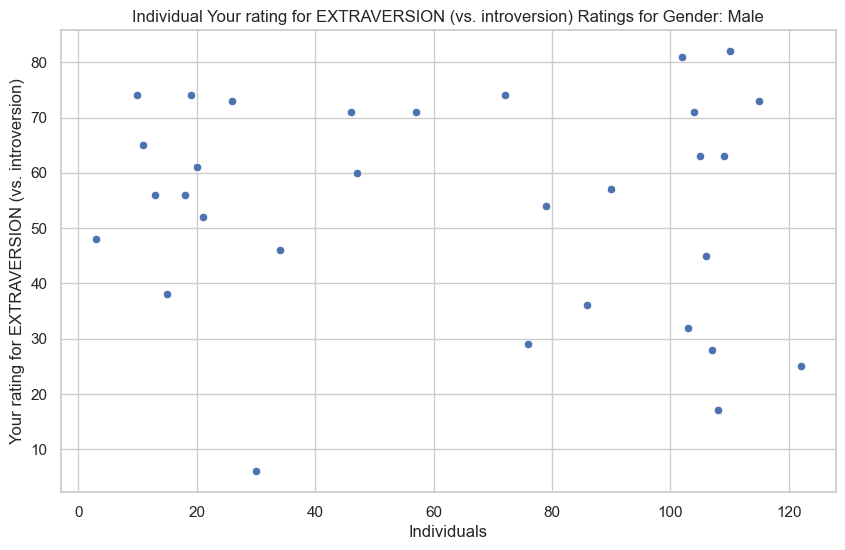

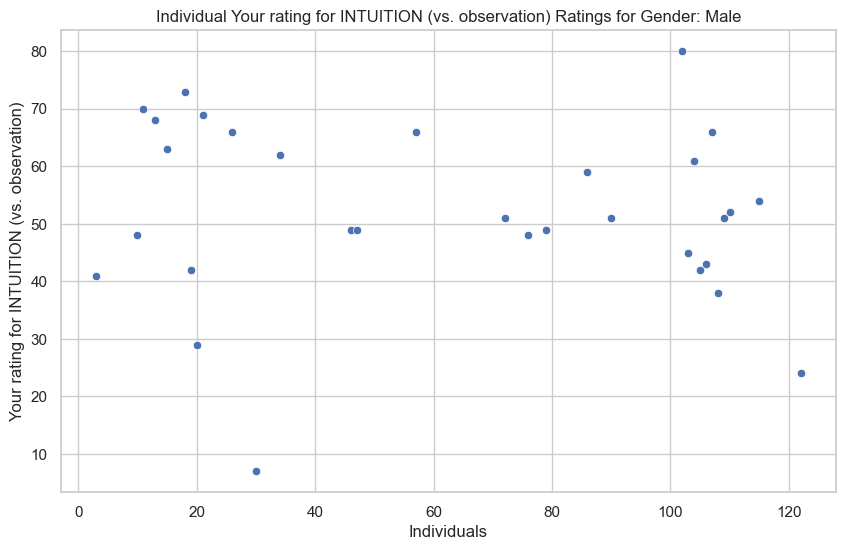

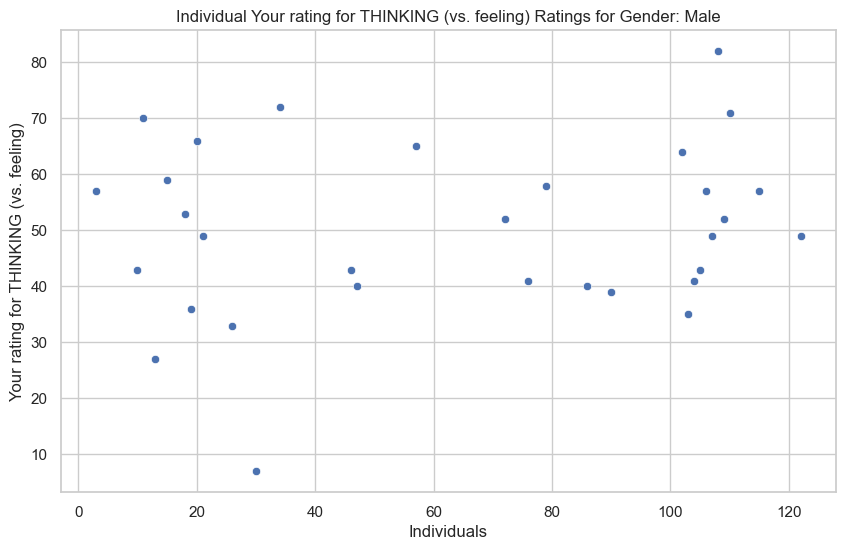

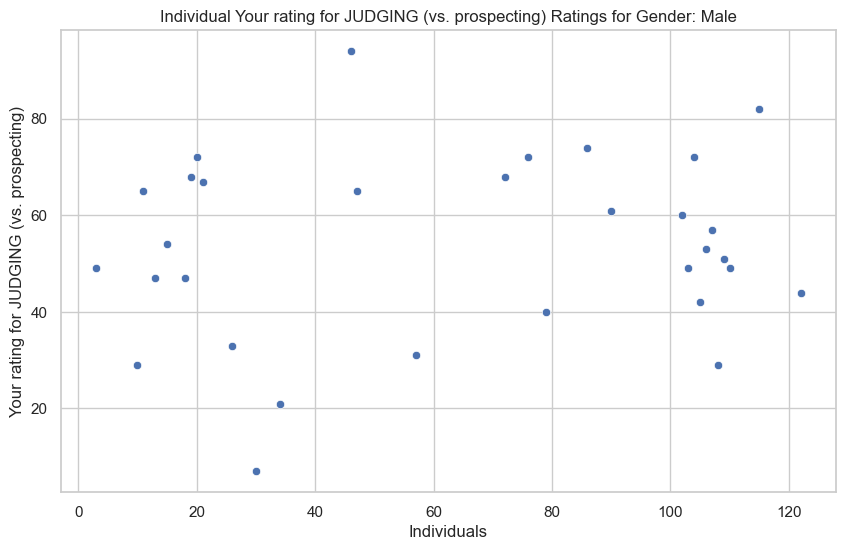

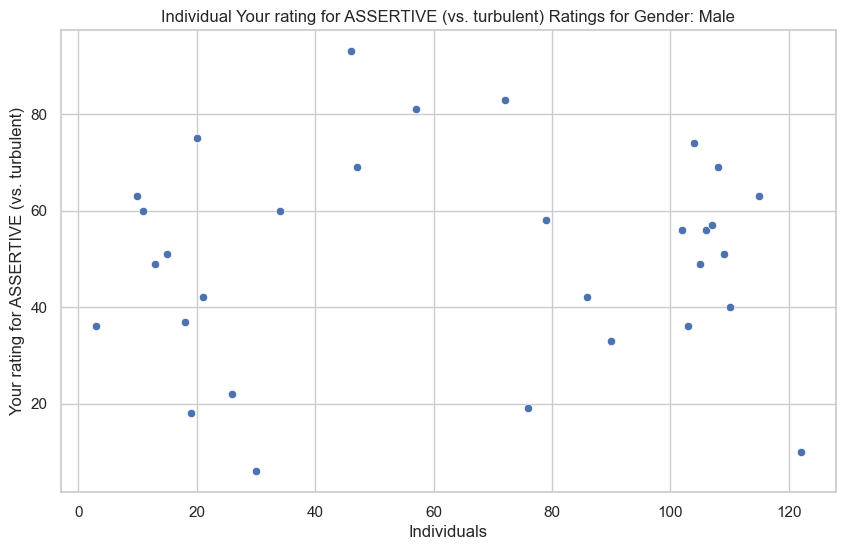

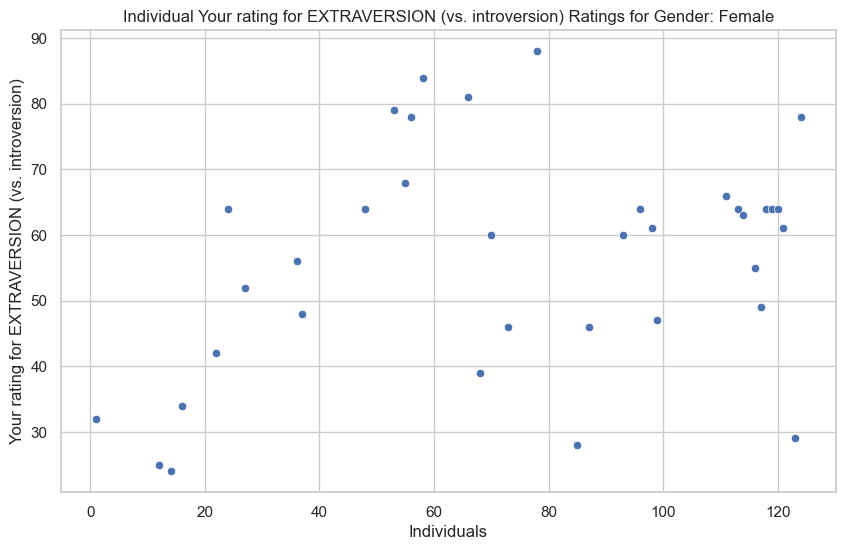

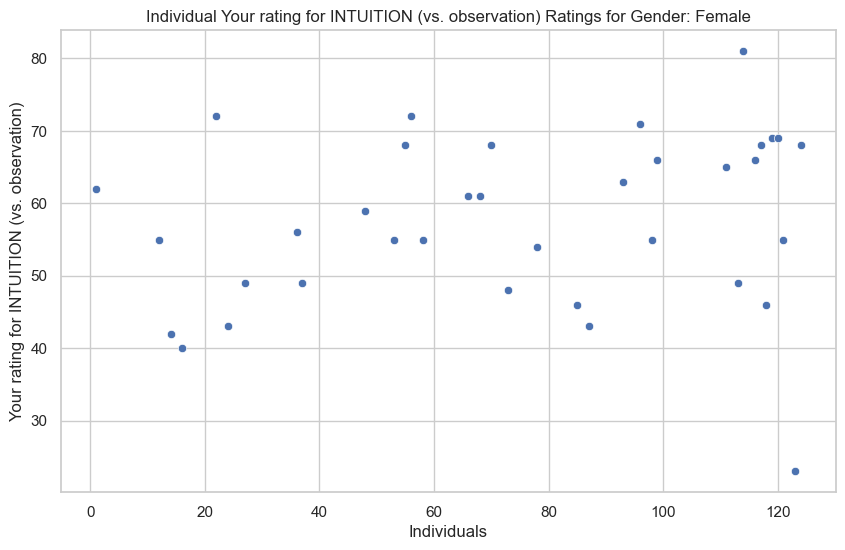

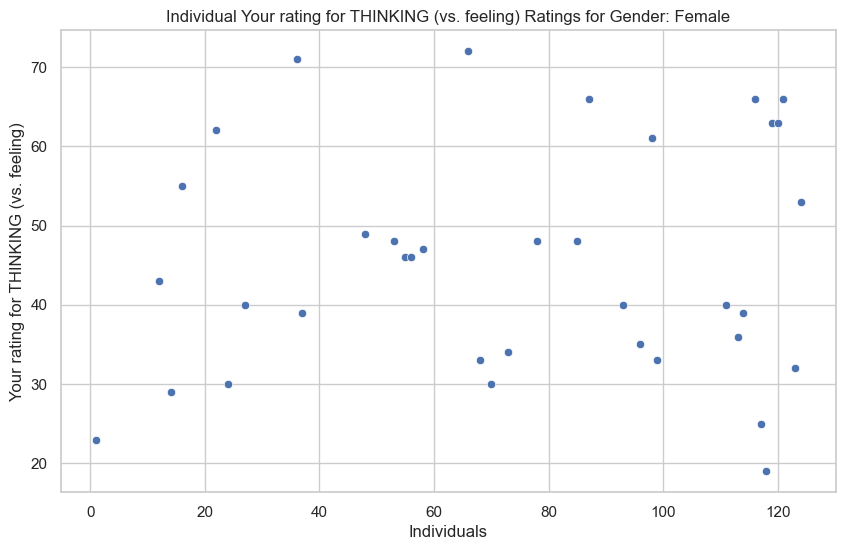

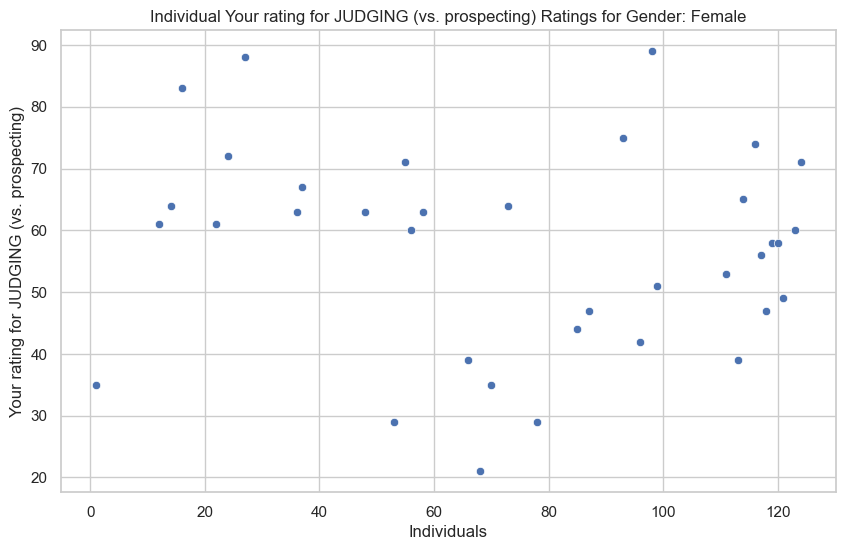

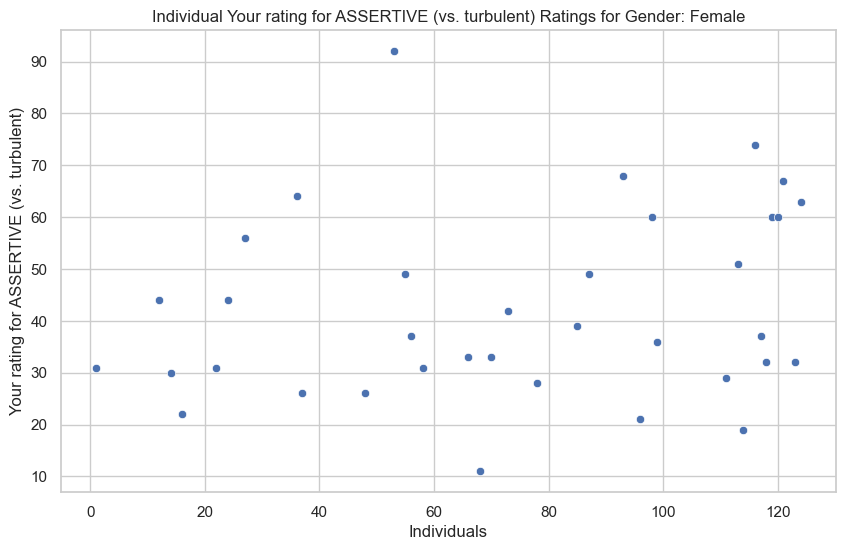

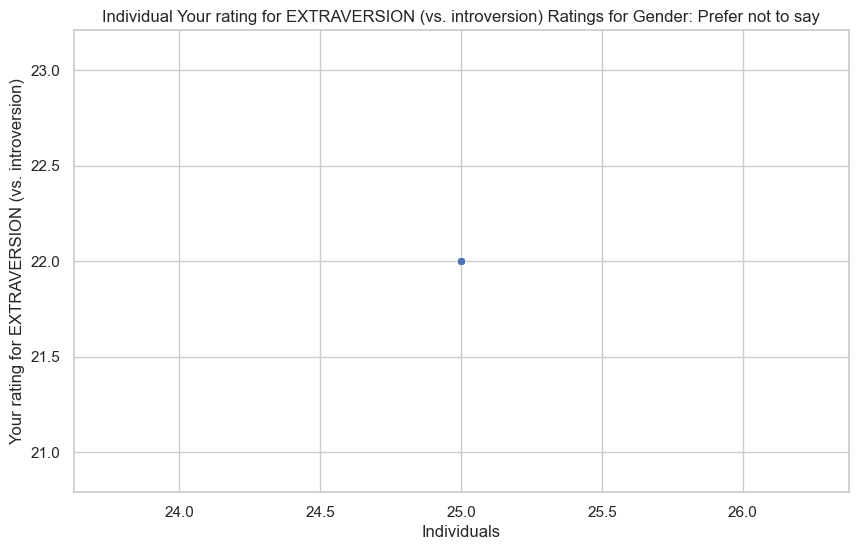

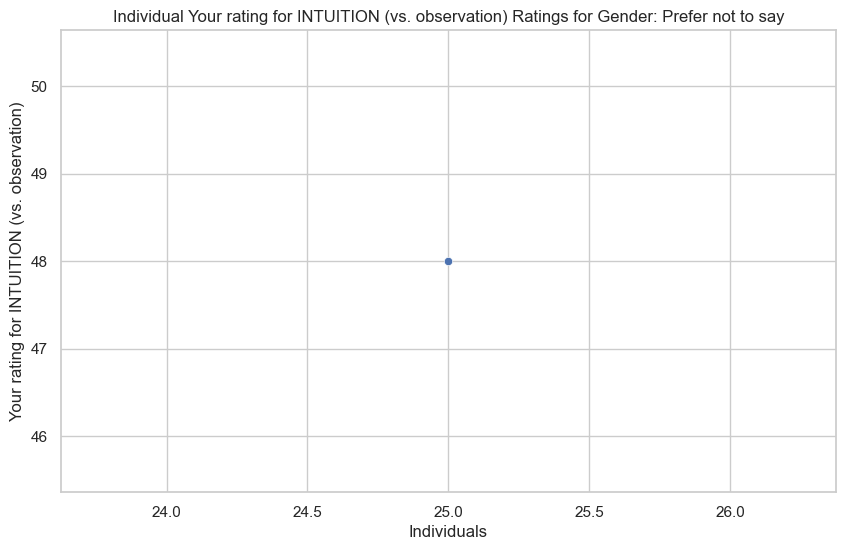

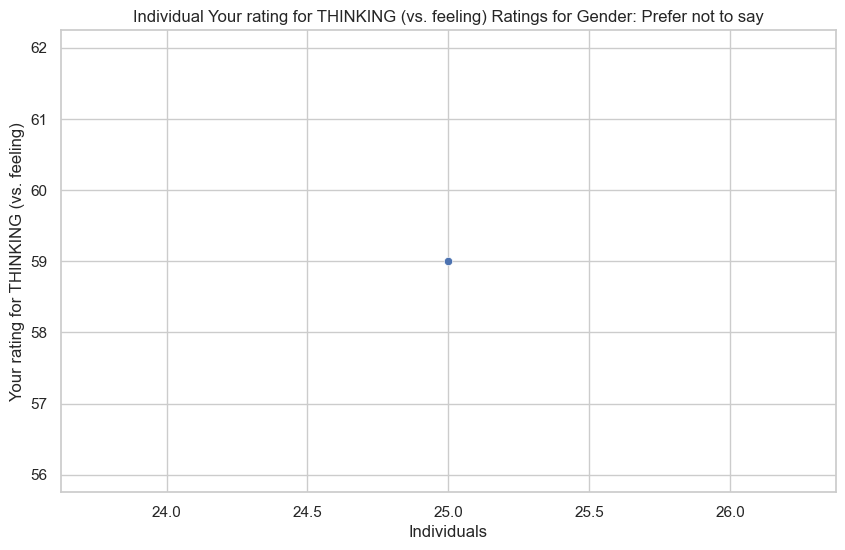

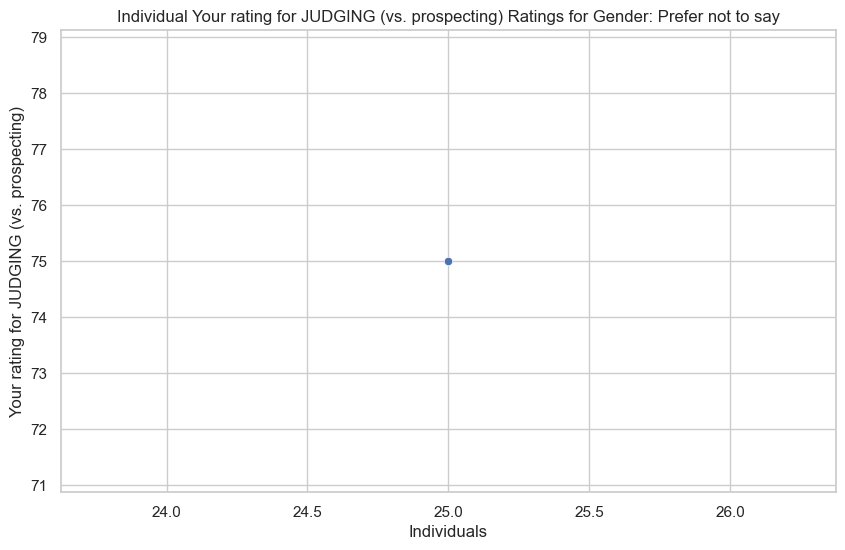

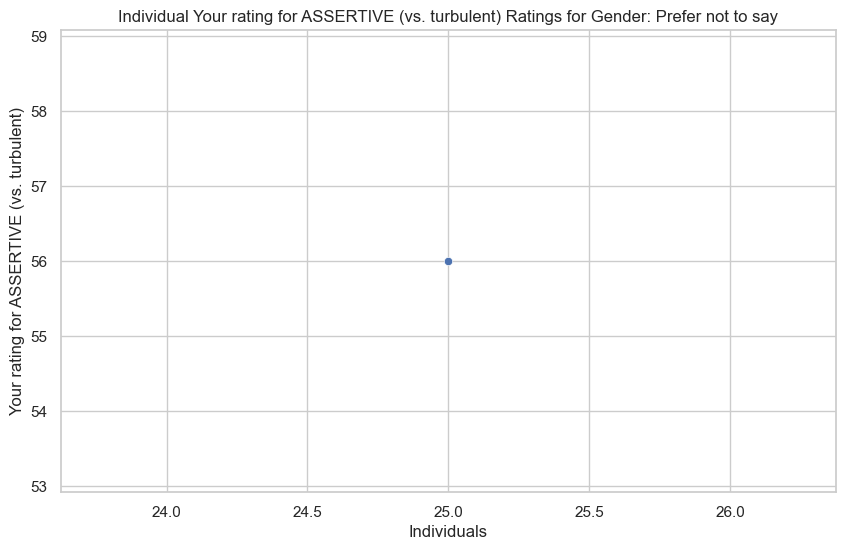

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your merged DataFrame and 'Gender' is the column with gender information
genders = merged_df['Gender'].unique()  # Get unique gender values

# Personality rating columns - replace these with the actual column names from your dataset
personality_ratings = [
    'Your rating for EXTRAVERSION (vs. introversion)',
    'Your rating for INTUITION (vs. observation)',
    'Your rating for THINKING (vs. feeling)',
    'Your rating for JUDGING (vs. prospecting)',
    'Your rating for ASSERTIVE (vs. turbulent)'
]

# Iterate through each gender and plot scatterplots for each personality rating
for gender in genders:
    gender_df = merged_df[merged_df['Gender'] == gender]  # Filter the dataset for each gender
    
    for rating in personality_ratings:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=gender_df, x=gender_df.index, y=rating)
        plt.title(f'Individual {rating} Ratings for Gender: {gender}')
        plt.xlabel('Individuals')
        plt.ylabel(rating)
        plt.show()


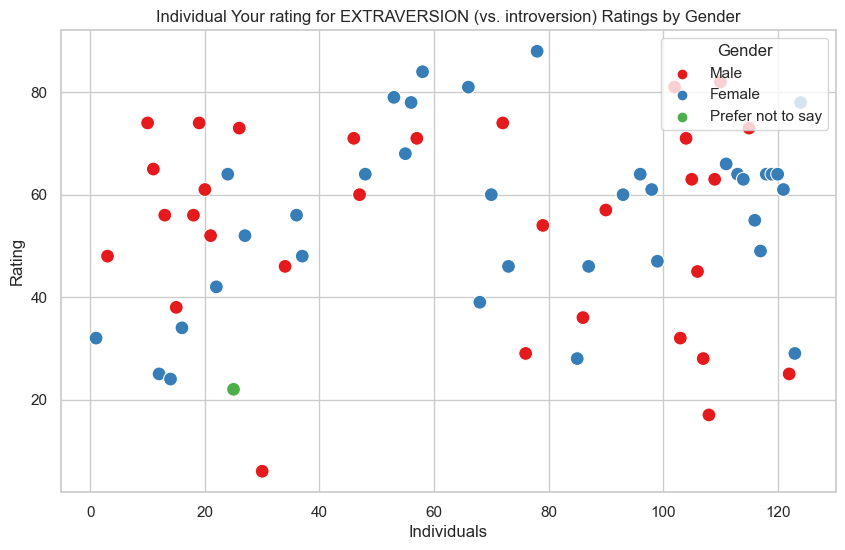

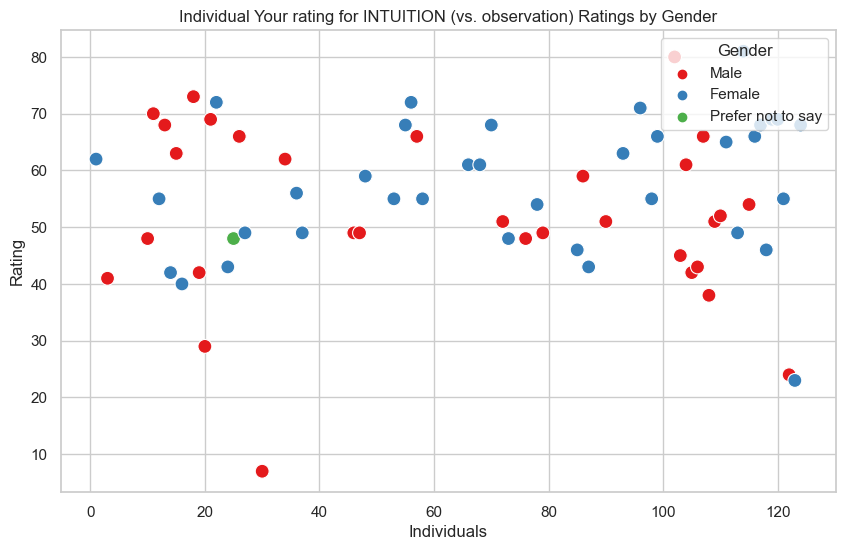

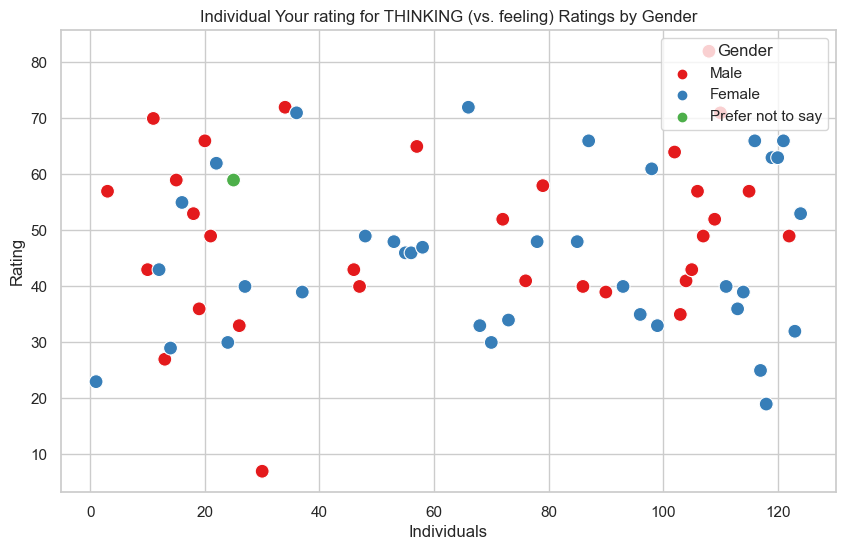

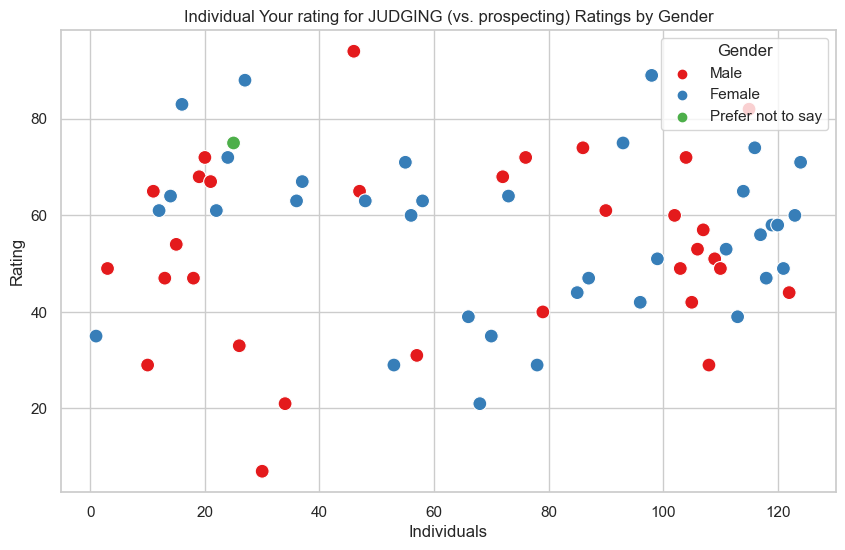

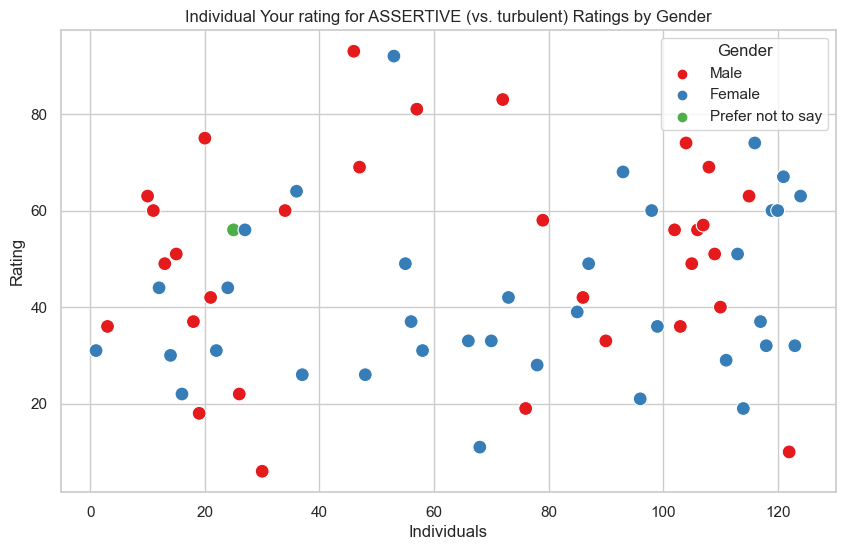

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' is your DataFrame
# Define the personality rating columns (replace with your actual column names)
personality_ratings = [
    'Your rating for EXTRAVERSION (vs. introversion)',
    'Your rating for INTUITION (vs. observation)',
    'Your rating for THINKING (vs. feeling)',
    'Your rating for JUDGING (vs. prospecting)',
    'Your rating for ASSERTIVE (vs. turbulent)'
]

# Set the style
sns.set(style="whitegrid")

# Iterate through each personality rating to create scatter plots
for rating in personality_ratings:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x=merged_df.index, y=rating, hue='Gender', palette='Set1', s=100)
    plt.title(f'Individual {rating} Ratings by Gender')
    plt.xlabel('Individuals')
    plt.ylabel('Rating')
    plt.legend(title='Gender', loc='upper right')
    plt.show()


In [15]:
import pandas as pd

# Assuming 'merged_df' is your DataFrame and it contains 'Height' (in cm) and 'Weight' (in kg) columns
# Convert height from cm to meters by dividing by 100
merged_df['Height in meters'] = merged_df['Height (in cm)'] / 100

# Calculate BMI
merged_df['BMI'] = merged_df['Weight (in kg)'] / (merged_df['Height in meters'] ** 2)

# Display the DataFrame with the new BMI column
print(merged_df[['Height (in cm)', 'Weight (in kg)', 'BMI']].head(65))


    Height (in cm)  Weight (in kg)        BMI
0            178.0            92.0  29.036738
1            155.0            55.0  22.892820
2            180.0            55.0  16.975309
3            187.0            76.0  21.733535
4            181.0            87.0  26.555966
..             ...             ...        ...
60           170.0            52.0  17.993080
61           158.0            69.0  27.639801
62           175.0            53.0  17.306122
63           183.0            80.0  23.888441
64           183.0            86.0  25.680074

[65 rows x 3 columns]


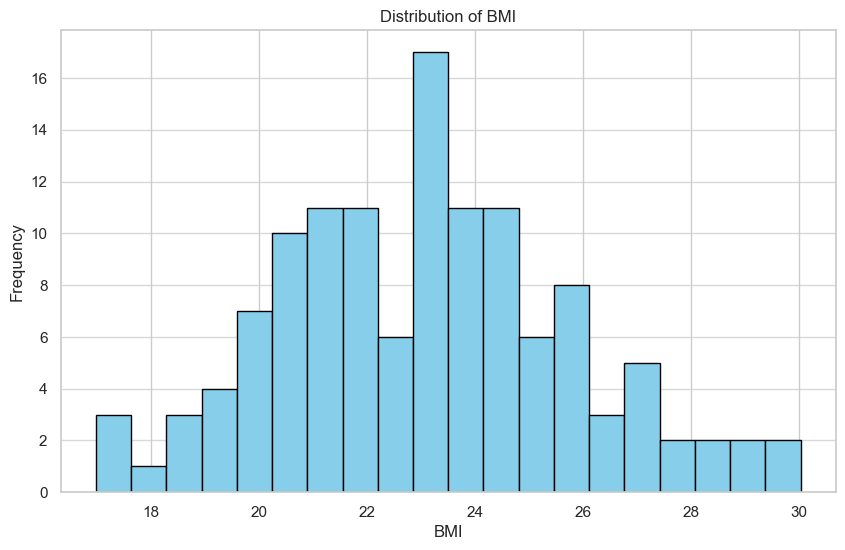

In [16]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and it already includes a 'BMI' column
# Plotting the histogram of BMI values
plt.figure(figsize=(10, 6))
plt.hist(merged_df['BMI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()


In [17]:
# Filter the DataFrame for individuals with normal BMI
normal_bmi_df = merged_df[(merged_df['BMI'] >= 18.5) & (merged_df['BMI'] <= 24.9)]

# Calculate the percentage of individuals with normal BMI
percentage_normal_bmi = (len(normal_bmi_df) / len(merged_df)) * 100

print(f"Percentage of individuals with normal BMI: {percentage_normal_bmi:.2f}%")


Percentage of individuals with normal BMI: 72.80%
